
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [1]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load data in dataframe
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Find the average age of those who survived and those who did not
survived_mask = titanic.Survived == 1
not_survived_mask = titanic.Survived == 0

In [6]:
titanic[survived_mask].Age.mean()

28.343689655172415

In [7]:
titanic[not_survived_mask].Age.mean()

30.62617924528302


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [8]:
from quilt.data.ResidentMario import missingno_data
import missingno as msno

<AxesSubplot:>

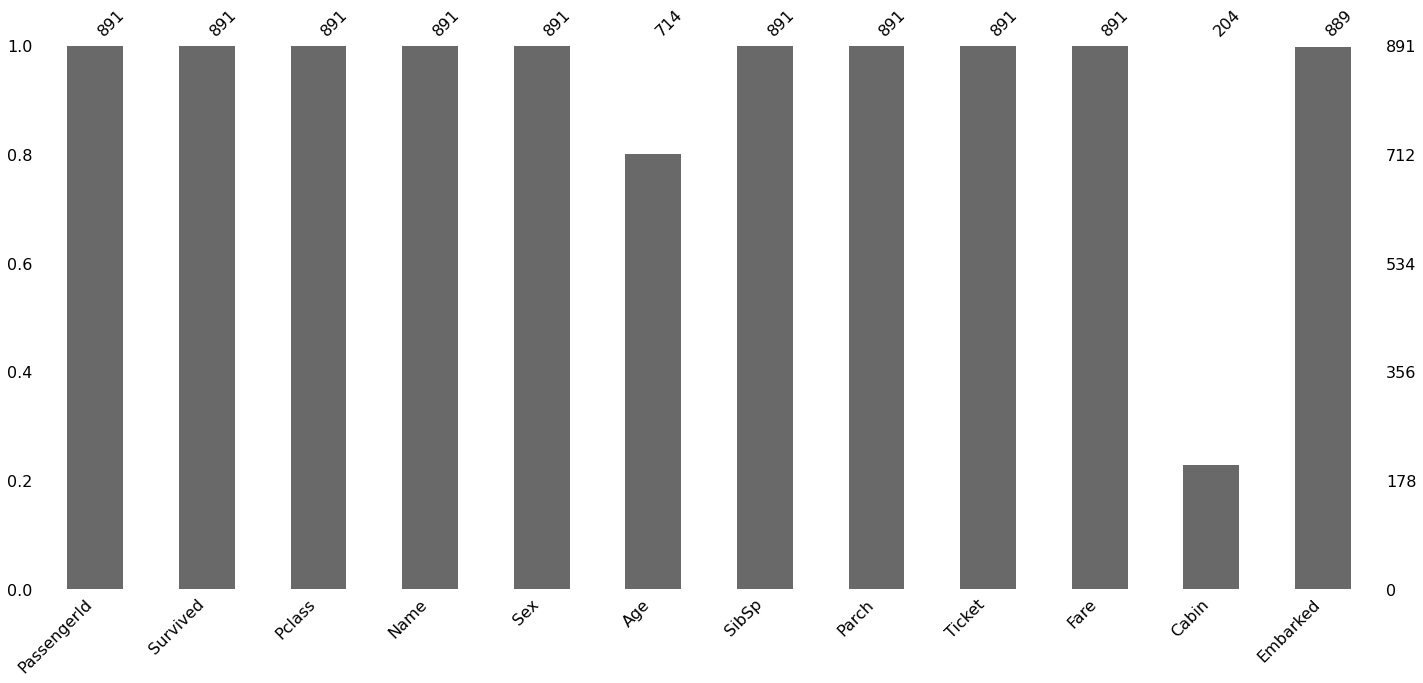

In [9]:
msno.bar(titanic)

In [10]:
#Your code here
empty_val_columns = []
no_of_empty_val = []
for x in titanic.columns:
    empty_val_columns.append(x)
    no_of_empty_val.append(titanic[f'{x}'].isnull().sum())
print (empty_val_columns)
print (no_of_empty_val)


    # create into an array and concat


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
[0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 2]


In [11]:
data = {'empty_val_columns':empty_val_columns,
       'np_of_empty_val':no_of_empty_val}

In [12]:
#empty_val_columns = np.array(empty_val_columns)
#no_of_empty_val = np.array(no_of_empty_val)

#empty_val_columns = empty_val_columns.reshape(12,1)
#no_of_empty_val = no_of_empty_val.reshape(12,1)

#no_of_empty_val

#data = np.concatenate((empty_val_columns,no_of_empty_val),axis=1)

#data.shape

In [13]:
data

{'empty_val_columns': ['PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'],
 'np_of_empty_val': [0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 2]}

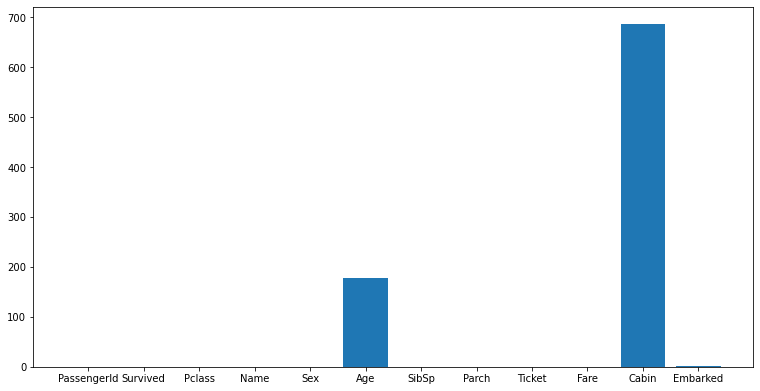

In [14]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(empty_val_columns,no_of_empty_val)
plt.show()

In [15]:
embarked_mask = titanic.Embarked == np.nan

In [16]:
titanic.dropna(subset = ["Embarked"],inplace=True)
titanic.reset_index(inplace=True)
titanic.loc[60:63]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
61,62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
62,63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
63,64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        889 non-null    int64  
 1   PassengerId  889 non-null    int64  
 2   Survived     889 non-null    int64  
 3   Pclass       889 non-null    int64  
 4   Name         889 non-null    object 
 5   Sex          889 non-null    object 
 6   Age          712 non-null    float64
 7   SibSp        889 non-null    int64  
 8   Parch        889 non-null    int64  
 9   Ticket       889 non-null    object 
 10  Fare         889 non-null    float64
 11  Cabin        202 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.4+ KB


In [18]:
titanic['Cabin'] = titanic['Cabin'].fillna('¯\(ツ)/¯')

In [19]:
titanic.Cabin.unique()#Your code here 

array(['¯\\(ツ)/¯', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
      

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [20]:
titanic.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [21]:
titanic['FamilyCount'] = titanic['Parch'] + titanic['SibSp']

In [22]:
new_columns = pd.get_dummies(titanic.Embarked,columns = ['S','Q','C'])
titanic = pd.concat([titanic,new_columns], axis = 1)

In [23]:
titanic.rename(columns={"C":"Embarked_C","Q":"Embarked_Q","S":"Embarked_S"})

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,0,0,1
885,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,1
886,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,0,1
887,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,0,0


In [24]:
titanic.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,C,Q,S
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,1


In [25]:
titanic['IsReverend']= titanic.Name.apply(lambda x: 1 if 'Rev.' in x else 0)

In [26]:
titanic['IsMr']= titanic.Name.apply(lambda x: 1 if 'Mr.' in x else 0)

In [27]:
titanic.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,C,Q,S,IsReverend,IsMr
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,1,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,1,0,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,1,0,1


In [28]:
titanic.IsMr.value_counts()

1    517
0    372
Name: IsMr, dtype: int64

In [29]:
titanic['IsMrs']= titanic.Name.apply(lambda x: 1 if 'Mrs.' in x else 0)

In [30]:
titanic.IsMrs.value_counts()

0    765
1    124
Name: IsMrs, dtype: int64

In [31]:
sex_columns = pd.get_dummies(titanic.Sex,columns = ['Male','Felmale'])

In [32]:
titanic = pd.concat([titanic,sex_columns],axis = 1)#Your code here 

In [33]:
titanic.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,Embarked,FamilyCount,C,Q,S,IsReverend,IsMr,IsMrs,female,male
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,...,S,1,0,0,1,0,1,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,...,C,1,1,0,0,0,0,1,1,0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,...,S,0,0,0,1,0,0,0,1,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,...,S,1,0,0,1,0,0,1,1,0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,...,S,0,0,0,1,0,1,0,0,1


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [34]:
#Your code here 
print (f'overall survival rate: {titanic.Survived.sum()/len(titanic)}')

overall survival rate: 0.38245219347581555


In [35]:
titanic.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,Embarked,FamilyCount,C,Q,S,IsReverend,IsMr,IsMrs,female,male
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,...,S,1,0,0,1,0,1,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,...,C,1,1,0,0,0,0,1,1,0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,...,S,0,0,0,1,0,0,0,1,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,...,S,1,0,0,1,0,0,1,1,0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,...,S,0,0,0,1,0,1,0,0,1


In [36]:
#Rev survival Rate
titanic.loc[titanic['Survived'] == 1, 'IsReverend'].sum()/titanic.IsReverend.sum()

0.0

In [37]:
titanic.Pclass.unique()

array([3, 1, 2])

In [38]:
data_array =  np.vstack((class_survival_rate,np.array(['1','2','3']))
survival_rate_table = pd.DataFrame(data = data_array,columns = ['Class','Survival Rate'],index = [0,1,2]) #data_array
                        

SyntaxError: invalid syntax (<ipython-input-38-11462554021f>, line 2)

In [ ]:
arr1 = np.array([1,2,3])
arr2 = np.array([3,3,3])

In [ ]:
arr1.shape
arr2.shape

In [ ]:
x = np.concatenate((arr1,arr2),axis=0)

In [39]:
male_survival = titanic.loc[titanic['Survived' == 1, 'male'].sum()/titanic.male.sum()
                            

SyntaxError: unexpected EOF while parsing (<ipython-input-39-a9903657ec1b>, line 2)

In [40]:
male_survival = titanic.loc[titanic['Survived']==1,'male'].sum()/titanic.male.sum()
female_survival = titanic.loc[titanic['Survived']==1,'female'].sum()/titanic.female.sum()
print(f'male survival rate: {male_survival}')
print(f'female survival rate: {female_survival}')

male survival rate: 0.18890814558058924
female survival rate: 0.7403846153846154


In [41]:
class_survival_rate = np.array([x for x in titanic.groupby('Pclass').Survived.sum()])/np.array([x for x in titanic.groupby('Pclass').Survived.count()])
class_survival_rate = list(class_survival_rate)
p_class_list = list(sorted(titanic.Pclass.unique()))

p_surv_data =[[p_class_list[i],class_survival_rate[i]] for i in range(0,len(p_class_list))]
p_surv_chart = pd.DataFrame(data=np.array(p_surv_data),columns = ['Pclass','Survival Rate'], index = range(3))
p_surv_chart


,Pclass,Survival Rate
0,1.0,0.626168
1,2.0,0.472826
2,3.0,0.242363


In [42]:
titanic.groupby('Cabin').Survived.value_counts()
print(f'cabin with ¯\(ツ)/¯ survival rate: {206/(206+481)}')

cabin with ¯\(ツ)/¯ survival rate: 0.29985443959243085


In [43]:
c_port_sr = titanic[titanic.Embarked == 'C'].Survived.sum()/len(titanic[titanic.Embarked == 'C'])
q_port_sr = titanic[titanic.Embarked == 'Q'].Survived.sum()/len(titanic[titanic.Embarked == 'Q'])
s_port_sr = titanic[titanic.Embarked == 'S'].Survived.sum()/len(titanic[titanic.Embarked == 'S'])

print(f'C port survival rate; {c_port_sr}')
print(f'Q port survival rate; {q_port_sr}')
print(f'S port survival rate; {s_port_sr}')

C port survival rate; 0.5535714285714286
Q port survival rate; 0.38961038961038963
S port survival rate; 0.33695652173913043


In [44]:
titanic.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [45]:
sr_12yo_class3 = len(titanic[(titanic.Age < 12) & (titanic.Pclass == 3) & (titanic.Survived== 1)])/len(titanic[(titanic.Age < 12) & (titanic.Pclass == 3)])
sr_12yo_class2 = len(titanic[(titanic.Age < 12) & (titanic.Pclass == 2) & (titanic.Survived== 1)])/len(titanic[(titanic.Age < 12) & (titanic.Pclass == 2)])
sr_12yo_class1 = len(titanic[(titanic.Age < 12) & (titanic.Pclass == 1) & (titanic.Survived== 1)])/len(titanic[(titanic.Age < 12) & (titanic.Pclass == 1)])

print (f'Survival Rate for under 12 in Class 1: {sr_12yo_class1}')
print (f'Survival Rate for under 12 in Class 2: {sr_12yo_class2}')
print (f'Survival Rate for under 12 in Class 3: {sr_12yo_class3}')

Survival Rate for under 12 in Class 1: 0.75
Survival Rate for under 12 in Class 2: 1.0
Survival Rate for under 12 in Class 3: 0.40425531914893614


In [46]:
titanic[titanic.Survived==0].sort_values('Fare',ascending=False).head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,Embarked,FamilyCount,C,Q,S,IsReverend,IsMr,IsMrs,female,male
27,27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,...,S,5,0,0,1,0,1,0,0,1
437,438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,...,S,5,0,0,1,0,1,0,0,1
117,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,...,C,1,1,0,0,0,1,0,0,1
556,557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,...,C,0,1,0,0,0,1,0,0,1
526,527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,...,S,0,0,0,1,0,1,0,0,1


In [47]:
print (f'most expensive ticket cost ${round(titanic[titanic.Survived==0].Fare.max(),2)} purchased by Mr Charles Alexander')

most expensive ticket cost $263.0 purchased by Mr Charles Alexander


In [48]:
titanic['IsCapt'] = titanic.Name.apply(lambda x: 1 if 'Capt' in x else 0)

In [49]:
titanic[(titanic.IsCapt==1)]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,FamilyCount,C,Q,S,IsReverend,IsMr,IsMrs,female,male,IsCapt
744,745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,...,2,0,0,1,0,0,0,0,1,1


The captain did not survive

In [50]:
titanic.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,FamilyCount,C,Q,S,IsReverend,IsMr,IsMrs,female,male,IsCapt
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,...,1,0,0,1,0,1,0,0,1,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,...,1,1,0,0,0,0,1,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,...,0,0,0,1,0,0,0,1,0,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,...,1,0,0,1,0,0,1,1,0,0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,...,0,0,0,1,0,1,0,0,1,0


In [51]:
sr_with_fam = len(titanic[(titanic.Survived == 1) & (titanic.FamilyCount == 1)])/len(titanic[(titanic.FamilyCount == 1)])
sr_without_fam = len(titanic[(titanic.Survived == 0) & (titanic.FamilyCount == 1)])/len(titanic[(titanic.FamilyCount == 1)])

print (f'survival rate with family is {round(sr_with_fam,2)} while without is {round(sr_without_fam,2)}')



survival rate with family is 0.55 while without is 0.45


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [52]:
import matplotlib.pyplot as plt

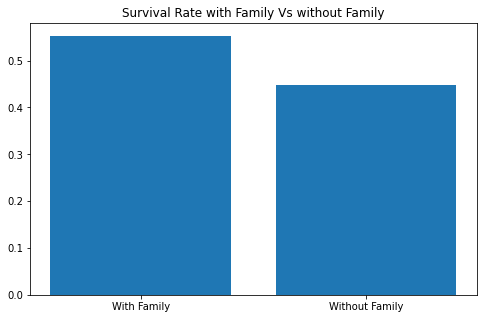

In [53]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create a bar chart.
# plt.bar() will create a vertical bar chart.
plt.bar(['With Family', 'Without Family'], [sr_with_fam, sr_without_fam])

# Add a title and show the plot.
plt.title("Survival Rate with Family Vs without Family");

In [54]:
titanic.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,FamilyCount,C,Q,S,IsReverend,IsMr,IsMrs,female,male,IsCapt
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,...,1,0,0,1,0,1,0,0,1,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,...,1,1,0,0,0,0,1,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,...,0,0,0,1,0,0,0,1,0,0


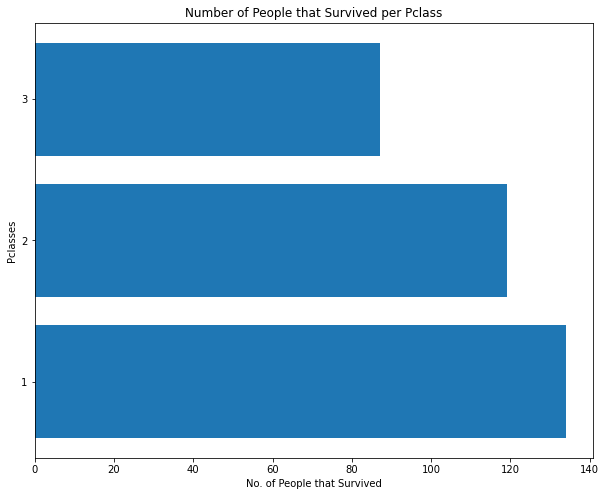

In [65]:
# Create a bar chart.
# plt.bar() will create a vertical bar chart.
# We have to pass in our X (labels) and Y (values).
plt.figure(figsize = (10,8))
plt.barh(['1','2','3'],
        titanic[(titanic.Survived == 1)].Pclass.value_counts())

# Add a title and show the plot.
plt.title('Number of People that Survived per Pclass');
plt.xlabel('No. of People that Survived');
plt.ylabel('Pclasses');

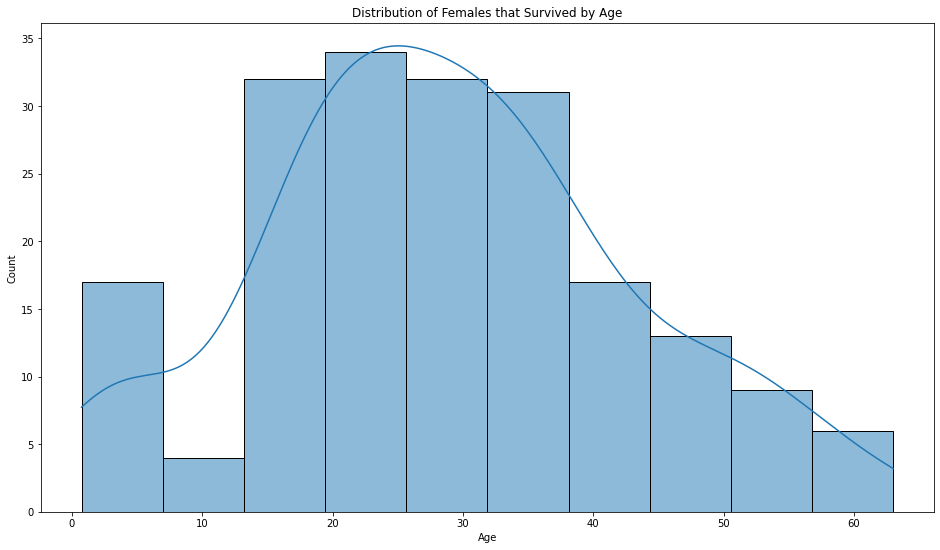

In [68]:
import seaborn as sns

#histogram of age to survival in female

#x axis is age, y axis is number of female that had survive

# Establish figure size.
plt.figure(figsize = (16,9))

sns.histplot(titanic[(titanic.Sex == 'female')&(titanic.Survived == 1)]['Age'], bins = 10,kde=True);
plt.title('Distribution of Females that Survived by Age');



In [69]:
pwd

'/Users/AdelAlsagoff/DSI/lab/2_01-lab-pandas-titanic'